<a href="https://colab.research.google.com/github/Emmanuel049/TP2Algo2/blob/main/7506R_TP1_GRUPO31_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos

In [ ]:
!pip install 'dtreeviz'

import pandas as pd
import joblib
import numpy as np
import sklearn as sk
import seaborn as sns
from math import sqrt
from matplotlib import pyplot as plt
from asociacionPaisesContinentes import asociacion_paises
from sklearn.preprocessing import OrdinalEncoder
import dtreeviz
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export_text
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from joblib import dump, load
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Cargamo los datasets

In [ ]:
dataframe_checkpoint1 = pd.read_csv("dataframe_checkpoint1.csv")
dataframe_copy = dataframe_checkpoint1.copy()

dataframe_hotel_test = pd.read_csv("hotels_test.csv")
dataframe_test_copia = dataframe_hotel_test.copy()

#Reanálisis de Datos

Verificamos las columas del checkpoint 1.

In [ ]:
dataframe_copy.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,diferentes
0,0,City Hotel,49,2016,September,37,5,1,2,1,...,No Deposit,9.0,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,False
1,1,Resort Hotel,4,2015,October,44,31,0,1,2,...,No Deposit,9.0,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,False
2,2,City Hotel,25,2016,October,42,13,0,1,2,...,No Deposit,9.0,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,False
3,3,City Hotel,26,2016,December,51,12,2,5,2,...,Non Refund,154.0,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,False
4,4,City Hotel,104,2017,March,12,19,2,5,2,...,No Deposit,20.0,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,False


Vemos que hay una columna unnamed: 0.
la borramos

In [ ]:
dataframe_copy.drop("Unnamed: 0", axis = 1, inplace = True)
dataframe_copy.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,diferentes
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,No Deposit,9.0,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,False
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,No Deposit,9.0,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,False
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,No Deposit,9.0,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,False
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,Non Refund,154.0,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,False
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,No Deposit,20.0,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,False


Verificamos las variables.

In [ ]:
tipo_de_variables = dataframe_copy.dtypes
tipo_de_variables

hotel                           object
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
arrival_date_week_number         int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
previous_cancellations           int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                          float64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spac

Para crear arboles de decisiones, necesitamos transformar las variables no numéricas.

In [ ]:
variables_no_numericas = dataframe_copy.dtypes[(dataframe_copy.dtypes != "int64") & (dataframe_copy.dtypes != "float64")].index
variables_no_numericas.to_list()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'id',
 'diferentes']

**Diferentes**

Esta variables fue creada en el checkpoint1 en esta etapa no nos es importante procedemos a borrarla

In [ ]:
dataframe_copy = dataframe_copy.drop("diferentes", axis = 1)
dataframe_copy

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,0,No Deposit,9.0,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,0,No Deposit,9.0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,0,No Deposit,9.0,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,0,Non Refund,154.0,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,0,No Deposit,20.0,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57079,Resort Hotel,24,2017,January,4,27,0,2,2,0,...,0,No Deposit,240.0,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
57080,City Hotel,0,2016,September,36,2,0,1,1,0,...,0,No Deposit,9.0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
57081,City Hotel,10,2017,May,19,8,1,2,1,0,...,0,No Deposit,9.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
57082,Resort Hotel,143,2015,October,41,10,2,5,2,0,...,0,Non Refund,96.0,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


**id**

Esta columna no proporciona información relevante ya que es un identificador.
procedemos a eliminarla.

In [ ]:
dataframe_copy.drop("id", axis = 1, inplace = True)
dataframe_copy

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,D,0,No Deposit,9.0,0,Transient,115.50,0,1,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,A,0,No Deposit,9.0,0,Transient,42.00,1,0,0
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,F,0,No Deposit,9.0,0,Transient,229.00,0,2,0
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,A,0,Non Refund,154.0,0,Transient,75.00,0,0,1
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,A,0,No Deposit,20.0,0,Transient-Party,75.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57079,Resort Hotel,24,2017,January,4,27,0,2,2,0,...,D,0,No Deposit,240.0,0,Transient,48.00,0,1,1
57080,City Hotel,0,2016,September,36,2,0,1,1,0,...,A,0,No Deposit,9.0,0,Transient,149.00,0,0,0
57081,City Hotel,10,2017,May,19,8,1,2,1,0,...,A,0,No Deposit,9.0,0,Transient,95.00,0,0,0
57082,Resort Hotel,143,2015,October,41,10,2,5,2,0,...,A,0,Non Refund,96.0,0,Transient,36.05,0,0,1


**country**

Como vimos anteriormente, esta columna tiene un gran numero de categorias unicas.

In [ ]:
columna_country = dataframe_copy['country'].unique().tolist()
print(columna_country)

['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU', 'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'IND', 'BEL', 'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF', 'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS', 'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'ARE', 'VNM', 'MOZ', 'MAR', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN', 'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB', 'SGP', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'NZL', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'SAU', 'COL', 'PAK', 'MDG', 'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY', 'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY', 'ETH', 'LTU', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA', 'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE', 'CAF', 'FRO', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'PRI', 'TJK', 'HND', 'PAN', 'CMR', 'KEN', 'UMI', 'PYF', 'GLP', 'BRB', 'CIV', 'ZMB', 'CUB', 'TGO', 'SYR', 'SDN', 'NAM', 'LKA', 'GHA', 'GTM',

In [ ]:
dataframe_copy['country'].value_counts()

PRT    24754
GBR     5273
FRA     4690
ESP     4134
DEU     3142
       ...  
ATA        1
FRO        1
UGA        1
VGB        1
RWA        1
Name: country, Length: 149, dtype: int64

Vamos a crear una columna que agrupe por continente todos estos paises.

In [ ]:
dataframe_copy ['continent'] = dataframe_copy['country'].map(asociacion_paises)

dataframe_copy['continent'].value_counts()

Europe           51748
Asia              2173
South America     1357
North America     1073
Africa             499
Oceania            233
Antartida            1
Name: continent, dtype: int64

Vemos que hay un posible valor (Antartida) que podría ser outlier.
lo sumamos al valor más frecuente.

In [ ]:
dataframe_copy['continent'] = dataframe_copy['continent'].replace('Antartida', 'Europe')
dataframe_copy['continent'].value_counts()

Europe           51749
Asia              2173
South America     1357
North America     1073
Africa             499
Oceania            233
Name: continent, dtype: int64

Eliminamos la columna country

In [ ]:
dataframe_copy.drop(columns=['country'], inplace=True)

**deposit_type**

Utilizaremos Ordinal encoder para tratar esta variable categorica

In [ ]:
dataframe_copy['deposit_type'].value_counts()

No Deposit    47919
Non Refund     9092
Refundable       73
Name: deposit_type, dtype: int64

In [ ]:
oe = OrdinalEncoder(dtype='int')

columns_to_encode = ['deposit_type']

try:
    dataframe_copy[['deposit_type_ordinal']] = oe.fit_transform(dataframe_copy[columns_to_encode])
except Exception as exc:
    print(f'Error: {exc}')

In [ ]:
dataframe_copy.drop(['deposit_type'], axis=1, inplace=True)

In [ ]:
dataframe_copy['deposit_type_ordinal'].value_counts()

0    47919
1     9092
2       73
Name: deposit_type_ordinal, dtype: int64

Actualizamos de las variables no numéricas las columnas que actualizamos.

In [ ]:
variables_no_numericas = dataframe_copy.dtypes[(dataframe_copy.dtypes != "int64") & (dataframe_copy.dtypes != "float64")].index
variables_no_numericas.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'continent']

Vamos a usar One hot Encoding con las variables categoricas que nos quedaron.

In [ ]:
dataframe_copy = pd.get_dummies(dataframe_copy, columns= variables_no_numericas, drop_first=True)

Observamos como nos quedo el dataframe

In [ ]:
dataframe_copy.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_I,assigned_room_type_K,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,49,2016,37,5,1,2,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,4,2015,44,31,0,1,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,25,2016,42,13,0,1,2,2,0,0,...,0,0,0,1,0,0,1,0,0,0
3,26,2016,51,12,2,5,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,104,2017,12,19,2,5,2,0,0,0,...,0,0,0,0,1,0,1,0,0,0


**Aplicamos las modificaciones en el dataset de test.**

Hacemos los cambios necesarios para que el dataset de test quede con los mismos cambios que el dataset del checkpoint 1.

In [ ]:
dataframe_test_copia.drop(columns = 'company', inplace = True)
moda_agent = dataframe_test_copia['agent'].mode()[0]
dataframe_test_copia['agent'].fillna(moda_agent,inplace = True)
dataframe_test_copia['country'].fillna('PRT',inplace = True)
moda_children = dataframe_test_copia['children'].mode()[0]
dataframe_test_copia['children'].fillna(moda_children,inplace = True)
dataframe_test_copia['meal'].replace(to_replace='Undefined',value='BB', inplace=True)
dataframe_test_copia['market_segment'].replace(to_replace='Undefined',value='Online TA', inplace=True)
dataframe_test_copia['distribution_channel'].replace(to_replace='Undefined',value='TA/TO', inplace=True)
dataframe_test_copia.drop('previous_bookings_not_canceled', axis=1, inplace=True)

Verificamos que no haya nulos

In [ ]:
dataframe_test_copia.isnull().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
agent                          0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status_date        0
id                             0
dtype: int64

In [ ]:
variables_no_numericas_test = dataframe_test_copia.dtypes[(dataframe_test_copia.dtypes != "int64") & (dataframe_test_copia.dtypes != "float64")].index
variables_no_numericas_test.to_list()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date',
 'id']

Aplicamos los cambios que hicimos en el dataset anterior.

**id(test)**

Borramos la columna id del dataframe de testeo

In [ ]:
dataframe_test_copia.drop("id", axis = 1, inplace = True)
dataframe_test_copia

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,A,0,Non Refund,9.0,0,Transient,100.00,0,0,2016-04-04
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,A,0,No Deposit,30.0,176,Transient-Party,101.00,0,0,2016-01-22
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,D,0,No Deposit,9.0,0,Transient,225.00,0,2,2016-08-24
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,G,0,No Deposit,240.0,0,Transient,96.00,0,0,2016-11-05
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,A,0,Non Refund,11.0,0,Transient,30.00,0,0,2016-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,City Hotel,31,2017,April,16,21,2,3,2,0.0,...,A,0,No Deposit,21.0,0,Transient-Party,85.00,0,0,2017-04-26
26531,City Hotel,130,2016,September,36,3,2,1,2,0.0,...,A,0,No Deposit,42.0,0,Transient,80.75,0,0,2016-09-06
26532,Resort Hotel,45,2016,August,35,22,1,1,2,0.0,...,A,0,No Deposit,240.0,0,Transient,231.00,0,0,2016-08-04
26533,City Hotel,164,2017,August,32,10,2,4,2,0.0,...,A,0,No Deposit,85.0,0,Transient,80.10,0,0,2017-03-07


**Country(test)**

Aplicamos en country la agrupación de paises por continentes

In [ ]:
columna_country = dataframe_test_copia['country'].unique().tolist()
print(columna_country)

['PRT', 'FRA', 'DEU', 'CN', 'GBR', 'ITA', 'IRL', 'USA', 'ESP', 'SWE', 'RWA', 'NLD', 'AUT', 'AUS', 'RUS', 'CHE', 'CHN', 'DNK', 'POL', 'BEL', 'BRA', 'TUR', 'NOR', 'EST', 'ISL', 'VEN', 'ISR', 'JPN', 'MAR', 'ATF', 'HRV', 'IRN', 'LTU', 'FIN', 'PER', 'LVA', 'KOR', 'LUX', 'JAM', 'HUN', 'DZA', 'TWN', 'ZWE', 'THA', 'ROU', 'IND', 'ARG', 'CHL', 'MEX', 'ARE', 'MOZ', 'SAU', 'URY', 'ECU', 'GRC', 'UZB', 'AGO', 'GIB', 'CZE', 'ZAF', 'TUN', 'TJK', 'BGR', 'COL', 'SRB', 'EGY', 'VNM', 'CYP', 'OMN', 'NZL', 'SUR', 'SVK', 'LBY', 'SGP', 'LBN', 'BLR', 'SEN', 'HKG', 'MDV', 'UKR', 'BIH', 'IDN', 'MAC', 'KWT', 'JOR', 'SLV', 'MYS', 'DMA', 'CMR', 'PHL', 'ASM', 'MLT', 'BGD', 'SVN', 'GHA', 'JEY', 'NGA', 'MCO', 'CPV', 'PAK', 'TZA', 'KAZ', 'BOL', 'DJI', 'QAT', 'IRQ', 'GNB', 'IMN', 'DOM', 'LIE', 'PRI', 'CUB', 'TMP', 'BHR', 'MKD', 'CAF', 'ALB', 'AND', 'MWI', 'PRY', 'LKA', 'GEO', 'CRI', 'UGA', 'GGY', 'ATA', 'SMR', 'BFA', 'MLI', 'BRB', 'GLP', 'KHM', 'STP', 'GAB', 'NIC']


In [ ]:
dataframe_test_copia ['continent'] = dataframe_test_copia['country'].map(asociacion_paises)

dataframe_test_copia['continent'].value_counts()

Europe           24186
Asia               926
South America      590
North America      445
Africa             260
Oceania            109
Antartida            1
Name: continent, dtype: int64

In [ ]:
dataframe_test_copia['continent'] = dataframe_test_copia['continent'].replace('Antartida', 'Europe')
dataframe_test_copia['continent'].value_counts()

Europe           24187
Asia               926
South America      590
North America      445
Africa             260
Oceania            109
Name: continent, dtype: int64

In [ ]:
dataframe_test_copia.drop(columns=['country'], inplace=True)

**deposit_type(test)**

Aplicamos Ordinal Encoder

In [ ]:
dataframe_test_copia['deposit_type'].value_counts()

No Deposit    22112
Non Refund     4396
Refundable       27
Name: deposit_type, dtype: int64

In [ ]:
oe = OrdinalEncoder(dtype='int')

columns_to_encode = ['deposit_type']

try:
    dataframe_test_copia[['deposit_type_ordinal']] = oe.fit_transform(dataframe_test_copia[columns_to_encode])
except Exception as exc:
    print(f'Error: {exc}')

In [ ]:
dataframe_test_copia.drop(['deposit_type'], axis=1, inplace=True)

In [ ]:
dataframe_test_copia['deposit_type_ordinal'].value_counts()

0    22112
1     4396
2       27
Name: deposit_type_ordinal, dtype: int64

In [ ]:
variables_no_numericas_test = dataframe_test_copia.dtypes[(dataframe_test_copia.dtypes != "int64") & (dataframe_test_copia.dtypes != "float64")].index
variables_no_numericas_test.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status_date',
 'continent']

Aplicamos One Hot Enconding

In [ ]:
dataframe_test_copia = pd.get_dummies(dataframe_test_copia, columns= variables_no_numericas, drop_first=True)

Comprobamos que los dos dataframes tengas las mismas columnas

In [ ]:
columnas_df1 = set(dataframe_test_copia.columns)
columnas_df2 = set(dataframe_copy.columns)

columnas_df1 = set(dataframe_copy.columns)
columnas_df2 = set(dataframe_test_copia.columns)

if columnas_df1 == columnas_df2:
    print("Ambos DataFrames tienen las mismas columnas.")
else:

  columnas_faltantes = columnas_df2 - columnas_df1
  columnas_faltantes1 = columnas_df1 - columnas_df2
  print("Las columnas que faltan en dataframe copy son:", columnas_faltantes)
  print("Las columnas que faltan en dataframe test son:", columnas_faltantes1)

Las columnas que faltan en dataframe copy son: {'reserved_room_type_L', 'reservation_status_date', 'reserved_room_type_P', 'assigned_room_type_P'}
Las columnas que faltan en dataframe test son: {'is_canceled'}


Vemos que en el dataframe de test falta la columna is_canceled.
Esta columna es la que vamos a entrenar en el dataset.
También vemos que en el dataframe que usamos en el checkpoint 1 faltan 4 columnas.
Vamos a analizar caso por caso.

In [ ]:
columnas_a_sumar = ['reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
                    'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L',
                    'reserved_room_type_P']

suma_por_columna = dataframe_test_copia[columnas_a_sumar].sum()

print(suma_por_columna)

reserved_room_type_B     241
reserved_room_type_C     202
reserved_room_type_D    4176
reserved_room_type_E    1352
reserved_room_type_F     630
reserved_room_type_G     442
reserved_room_type_H     118
reserved_room_type_L       3
reserved_room_type_P       5
dtype: int64


Los valores de las dos columnas que nos valtan "reserved_room_type_L" y "reserved_room_type_L", tienen muy poca cantidad, vamos a sumarlos más frecuente

In [ ]:
dataframe_test_copia['reserved_room_type_D'] += dataframe_test_copia['reserved_room_type_L'] + dataframe_test_copia['reserved_room_type_P']

dataframe_test_copia.drop(['reserved_room_type_L', 'reserved_room_type_P'], axis=1, inplace=True)

In [ ]:
columnas_a_sumar = ['reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
                    'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H']

suma_por_columna = dataframe_test_copia[columnas_a_sumar].sum()

print(suma_por_columna)

reserved_room_type_B     241
reserved_room_type_C     202
reserved_room_type_D    4184
reserved_room_type_E    1352
reserved_room_type_F     630
reserved_room_type_G     442
reserved_room_type_H     118
dtype: int64


Vamos a implementar lo mismo que reserver_room_type con assigned_room_type

In [ ]:
columnas_a_sumar1 = ['assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_P']

suma_por_columna = dataframe_test_copia[columnas_a_sumar1].sum()
print(suma_por_columna)

assigned_room_type_B     439
assigned_room_type_C     445
assigned_room_type_D    5316
assigned_room_type_E    1576
assigned_room_type_F     764
assigned_room_type_G     517
assigned_room_type_H     135
assigned_room_type_I      66
assigned_room_type_K      54
assigned_room_type_P       5
dtype: int64


In [ ]:
dataframe_test_copia['assigned_room_type_D'] += dataframe_test_copia['assigned_room_type_P']

dataframe_test_copia.drop(['assigned_room_type_P'], axis=1, inplace=True)

In [ ]:
columnas_a_sumar1 = ['assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', 'assigned_room_type_K']

suma_por_columna = dataframe_test_copia[columnas_a_sumar1].sum()
print(suma_por_columna)

assigned_room_type_B     439
assigned_room_type_C     445
assigned_room_type_D    5321
assigned_room_type_E    1576
assigned_room_type_F     764
assigned_room_type_G     517
assigned_room_type_H     135
assigned_room_type_I      66
assigned_room_type_K      54
dtype: int64


**reservation_status_date**

Esta columna no existe en el dataset anterior, procedemos a eliminarla

In [ ]:
dataframe_test_copia.drop(['reservation_status_date'], axis=1, inplace=True)

Verificamos nuevamente que los dataframe tengan las mismas columnas

In [ ]:
columnas_df1 = set(dataframe_test_copia.columns)
columnas_df2 = set(dataframe_copy.columns)

columnas_df1 = set(dataframe_copy.columns)
columnas_df2 = set(dataframe_test_copia.columns)

if columnas_df1 == columnas_df2:
    print("Ambos DataFrames tienen las mismas columnas.")
else:

  columnas_faltantes = columnas_df2 - columnas_df1
  columnas_faltantes1 = columnas_df1 - columnas_df2
  print("Las columnas que faltan en dataframe copy son:", columnas_faltantes)
  print("Las columnas que faltan en dataframe test son:", columnas_faltantes1)

Las columnas que faltan en dataframe copy son: set()
Las columnas que faltan en dataframe test son: {'is_canceled'}


#Arboles de decisiones

Entrenamiento

Generamos un dataset para predecir.

In [ ]:
dataframe_copy_x = dataframe_copy.drop(['is_canceled'], axis = 'columns', inplace= False)
dataframe_copy_y = dataframe_copy['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(dataframe_copy_x, dataframe_copy_y,test_size = 0.1, random_state = 5)

##Modelo 1

Criterio Gini

En este primero modelo utilizaremos valores aleatorios elegidos por nosotros.
Este arbol no estará optimizado, eso lo implementaremos a partir del modelo 2.
Creamos el arbol utilizando el criterio de Gini


In [ ]:
tree_model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 20, min_samples_leaf=7)
model = tree_model.fit(X = x_train, y = y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
ds_resultados = pd.DataFrame(zip(y_test,y_pred),columns = ['test','pred'])
ds_resultados

,test,pred
0,0,1
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
5704,1,0
5705,1,1
5706,0,0
5707,1,1


###**Matriz de confusión.**

Text(34.08333333333333, 0.5, 'True')

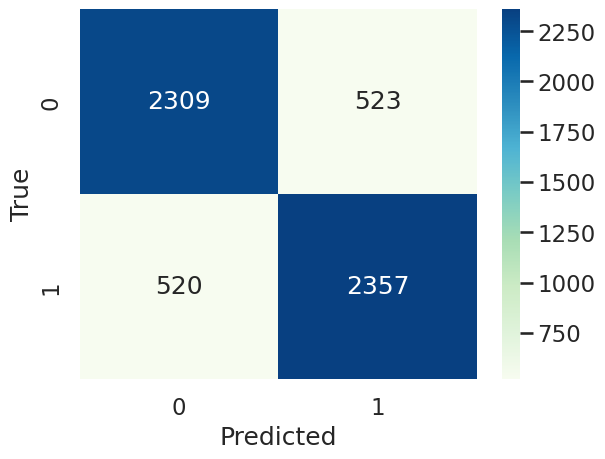

In [ ]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap="GnBu",annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')

###**Performance**

Este arbol que no esta opmitimizado tiene las siguientes performance:

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8173060080574531
Recall: 0.8192561696211331
Precision: 0.8184027777777778
f1 score: 0.8188292513461872


###**Reglas del arbol**

Otra forma de visualizar es viendo las reglas del arbol.

In [ ]:
reglas_1 = export_text(tree_model, feature_names= list(dataframe_copy_x.columns.tolist()))
print(reglas_1)

|--- deposit_type_ordinal <= 0.50
|   |--- lead_time <= 8.50
|   |   |--- previous_cancellations <= 0.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |   |--- adr <= 18.50
|   |   |   |   |   |   |   |--- arrival_date_day_of_month <= 23.50
|   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 14.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- arrival_date_week_number >  14.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- arrival_date_day_of_month >  23.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- adr >  18.50
|   |   |   |   |   |   |   |--- agent <= 6.50
|   |   |   |   |   |   |   |   |--- arrival_date_month_August <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- arrival_date_month_August >  0.

###**Grafico**

Graficamos el arbol.

Visualizamos el arbol obtenido

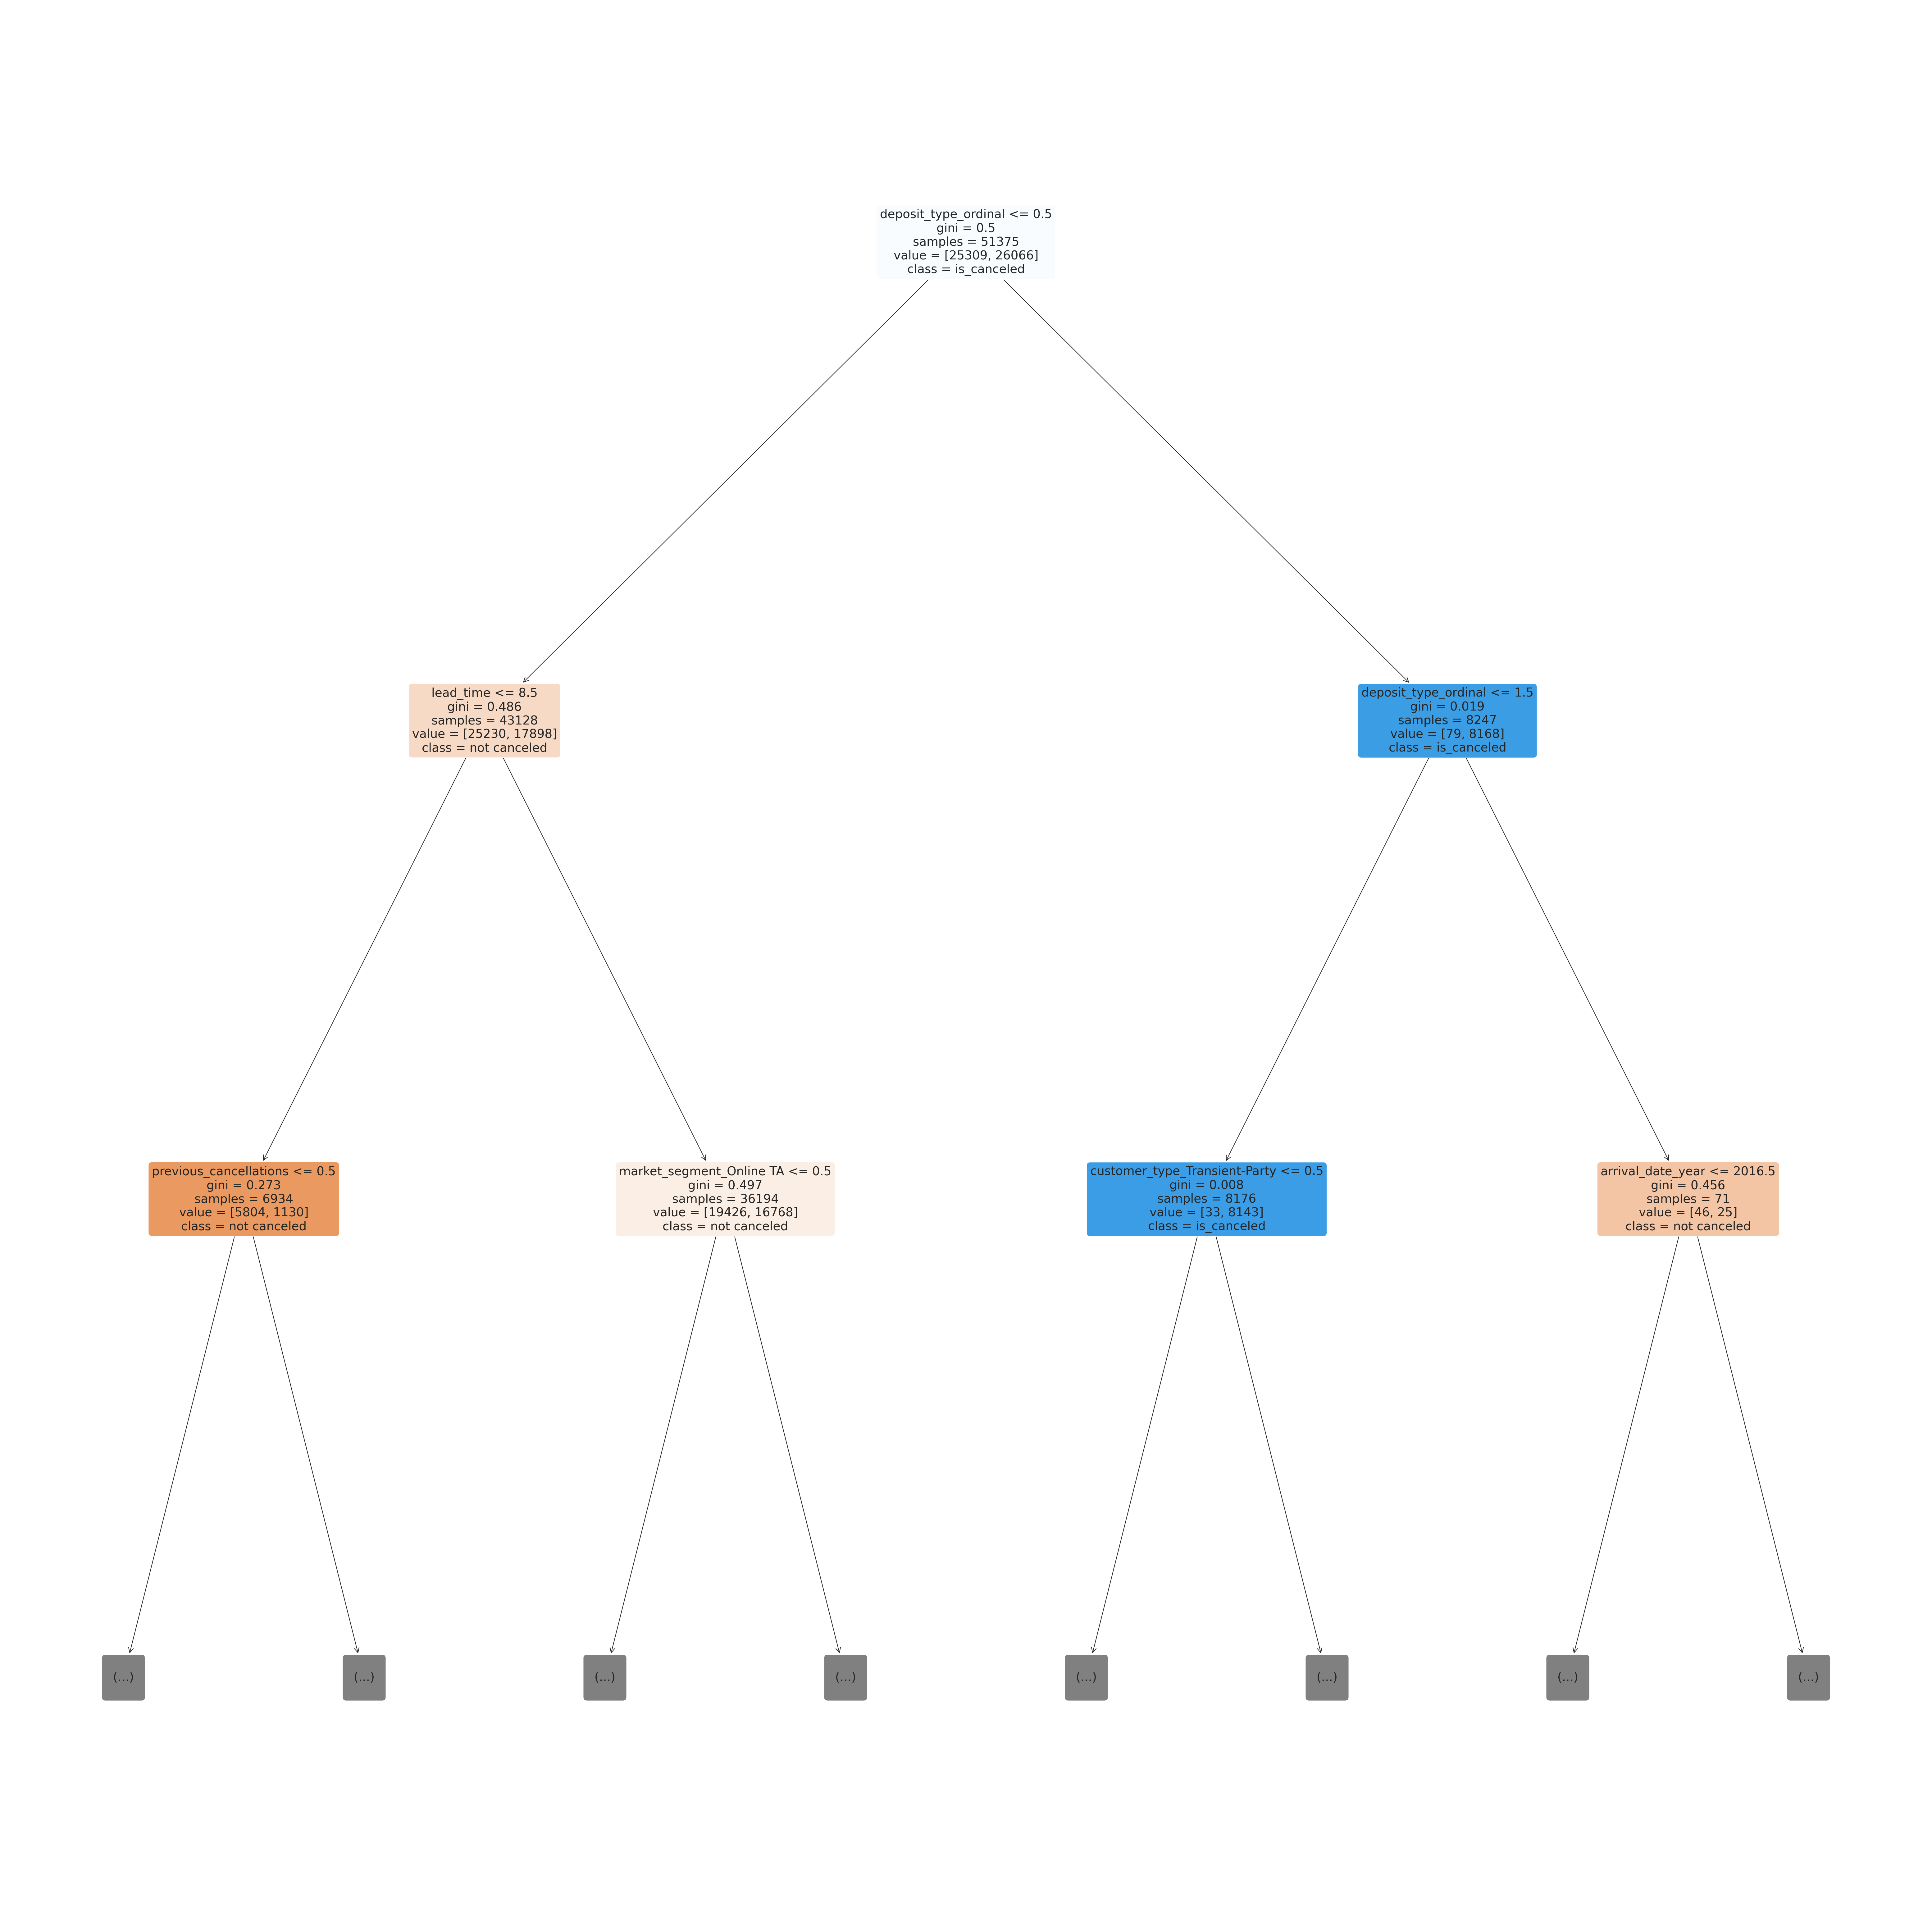

In [ ]:
plt.figure(figsize=(80,80))
tree_plot_completo = tree.plot_tree(model,
                                    max_depth = 2,
                                    feature_names = dataframe_copy_x.columns.to_list(),
                                    filled = True,
                                    rounded = True,
                                    class_names=['not canceled', 'is_canceled'])
plt.show(tree_plot_completo)

Realizamos la primera predicción.

In [ ]:
y_pred = model.predict(dataframe_test_copia)

y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
dataframe_submission = pd.DataFrame ({'id': dataframe_hotel_test['id'], 'is_canceled': y_pred})
dataframe_submission.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


Guardamos el primero modelo.

In [ ]:
dataframe_submission.to_csv('modelo_1.csv', index = False)

##Modelo 2

En este modelo intentamos mejorar el modelo 1

También usamos la técnica de Randomized Search Cross
con varias combinaciones.


In [ ]:
n=25
folds=10

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20,30 ,40, 50, 60, 70],
    'min_samples_split': [10, 12, 14, 16, 20],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [36, 38, 40, 42],
    'max_leaf_nodes': [450 ,500, 550, 600, 650, 700],
    'class_weight': ['balanced'],
    'ccp_alpha': [0, 0.00005555],
    'random_state': [5]
}
X_train, X_test, y_train, y_test = train_test_split(dataframe_copy_x, dataframe_copy_y, test_size=0.1, random_state=5)
model = DecisionTreeClassifier()


kfoldcv = StratifiedKFold(n_splits=folds)
scorer_fn = make_scorer(f1_score)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, scoring = scorer_fn, cv=kfoldcv, n_iter=n, random_state=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = DecisionTreeClassifier(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)

print("Mejores hiperparámetros encontrados:", best_params)
print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)
print("Recall en el conjunto de prueba:", recall)

Mejores hiperparámetros encontrados: {'splitter': 'best', 'random_state': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 600, 'max_features': 40, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0}
F1_score en el conjunto de prueba: 0.8293871866295264
Accuracy en el conjunto de prueba: 0.8283412156244526
Precision en el conjunto de prueba: 0.8308336239972096
Recall en el conjunto de prueba: 0.8279457768508863


###**Matriz de confusión**

Text(34.08333333333333, 0.5, 'True')

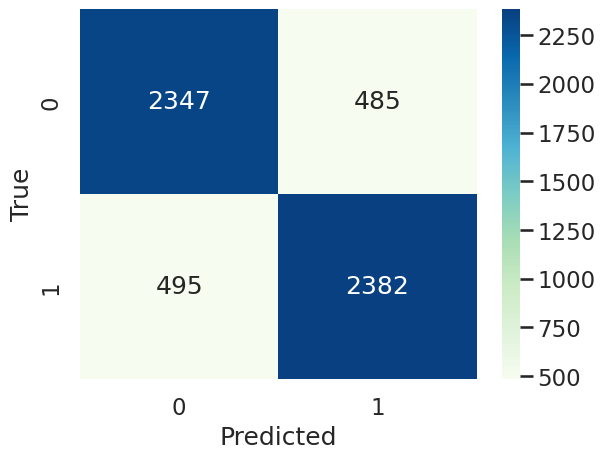

In [ ]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap="GnBu",annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')

###**Gráfico**

**Graficamos el arbol del modelo 2:**

Mostramos los primero 5 niveles



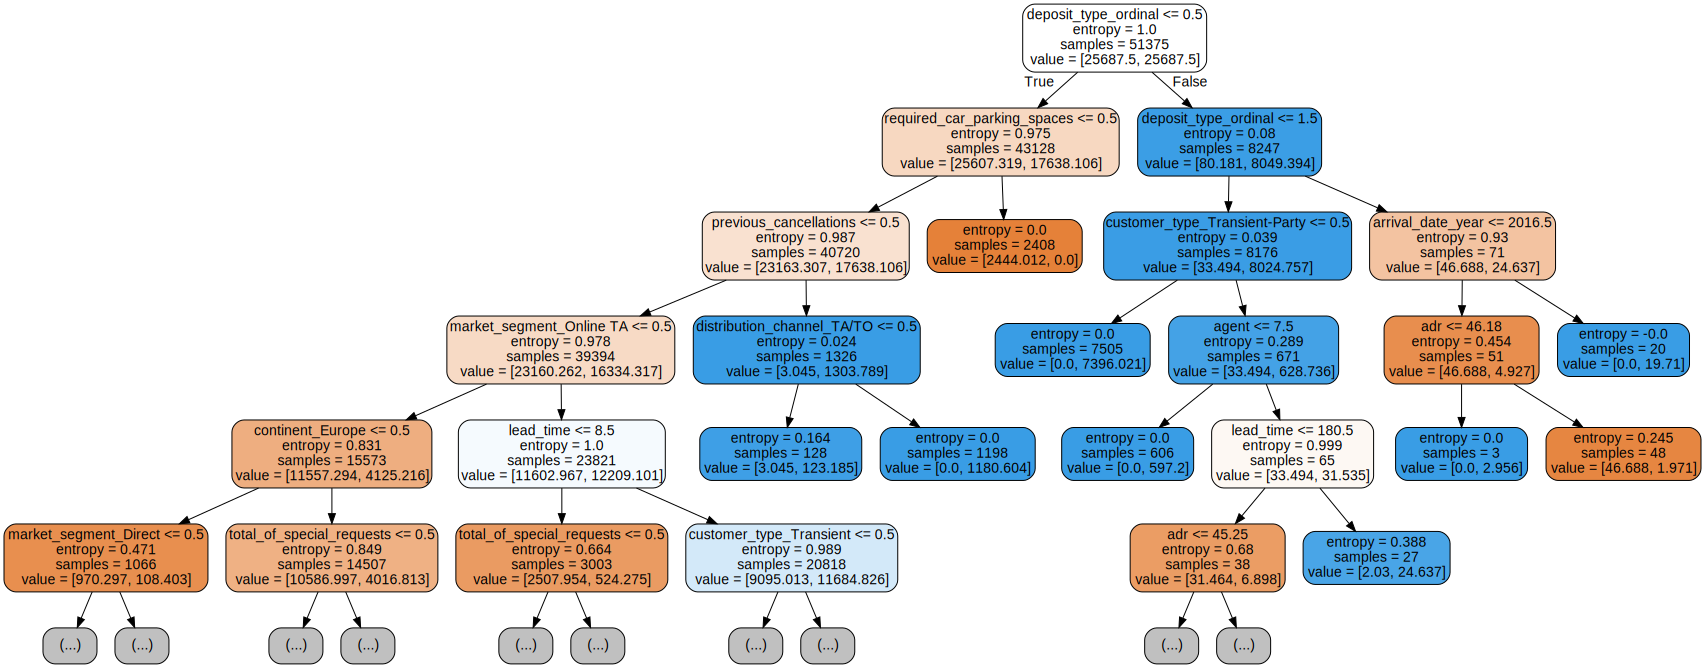

In [ ]:
dot_data = export_graphviz(best_model, out_file=None, feature_names=dataframe_copy_x.columns, filled=True, rounded=True, max_depth=5)
graphviz.Source(dot_data)

In [ ]:
joblib.dump(best_model, 'modelo_2.pkl')
loaded_model = joblib.load('modelo_2.pkl')
predicciones = loaded_model.predict(dataframe_test_copia)

In [ ]:
dataframe_submission = pd.DataFrame({'id': dataframe_hotel_test['id'], 'is_canceled': predicciones})
dataframe_submission.to_csv('modelo_2.csv', index = False)

##Modelo 3

En este modelo intentamos mejorar el modelo 2

También usamos la técnica de Randomized Search Cross.
En esta ajustamos los valores manualmente, utilizando una aproximación de los mejores valores del anterior modelo.

Vemos que el mejor criterio para este modelo es el Entropy

In [ ]:
param_dist = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': [30],
    'min_samples_split': [11],
    'min_samples_leaf': [1],
    'max_features':[39],
    'max_leaf_nodes': [600],
    'class_weight': ['balanced'],
    'ccp_alpha': [0],
    'random_state': [5]
}

X_train, X_test, y_train, y_test = train_test_split(dataframe_copy_x, dataframe_copy_y, test_size=0.1, random_state=5)
model = DecisionTreeClassifier()


kfoldcv = StratifiedKFold(n_splits=10)
scorer_fn = make_scorer(f1_score)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, scoring = scorer_fn, cv=kfoldcv, n_iter=25, random_state=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = DecisionTreeClassifier(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)

print("Mejores hiperparámetros encontrados:", best_params)
print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)
print("Recall en el conjunto de prueba:", recall)

Mejores hiperparámetros encontrados: {'splitter': 'best', 'random_state': 5, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_leaf_nodes': 600, 'max_features': 39, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0}
F1_score en el conjunto de prueba: 0.8345601121626358
Accuracy en el conjunto de prueba: 0.8346470485198809
Precision en el conjunto de prueba: 0.8416401555319901
Recall en el conjunto de prueba: 0.8275981925616962


###**Matriz de confunsión**

Observamos la matriz de confusión

Text(34.08333333333333, 0.5, 'True')

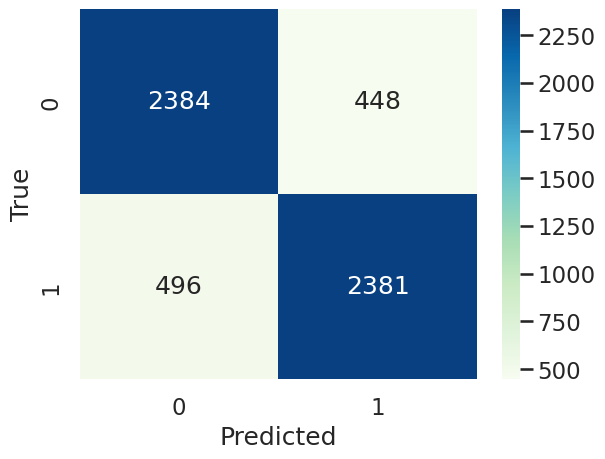

In [ ]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap="GnBu",annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')

###**Reglas del arbol**

Visualizamos las reglas del arbol

In [ ]:
reglas_arbol = export_text(best_model, feature_names=list(dataframe_copy_x.columns))
print(reglas_arbol)

|--- deposit_type_ordinal <= 0.50
|   |--- lead_time <= 8.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |--- lead_time <= 4.50
|   |   |   |   |   |   |--- adr <= 20.00
|   |   |   |   |   |   |   |--- assigned_room_type_D <= 0.50
|   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 51.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- arrival_date_week_number >  51.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- assigned_room_type_D >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- adr >  20.00
|   |   |   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |   |   |--- customer_type_Transient-Party <= 0.50
|   |   |   |   |   |   |   |   |   |--- adr <= 62.60
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 0.50

###**Gráfico**

Graficamos el arbol

Mostramos los primero 4 niveles

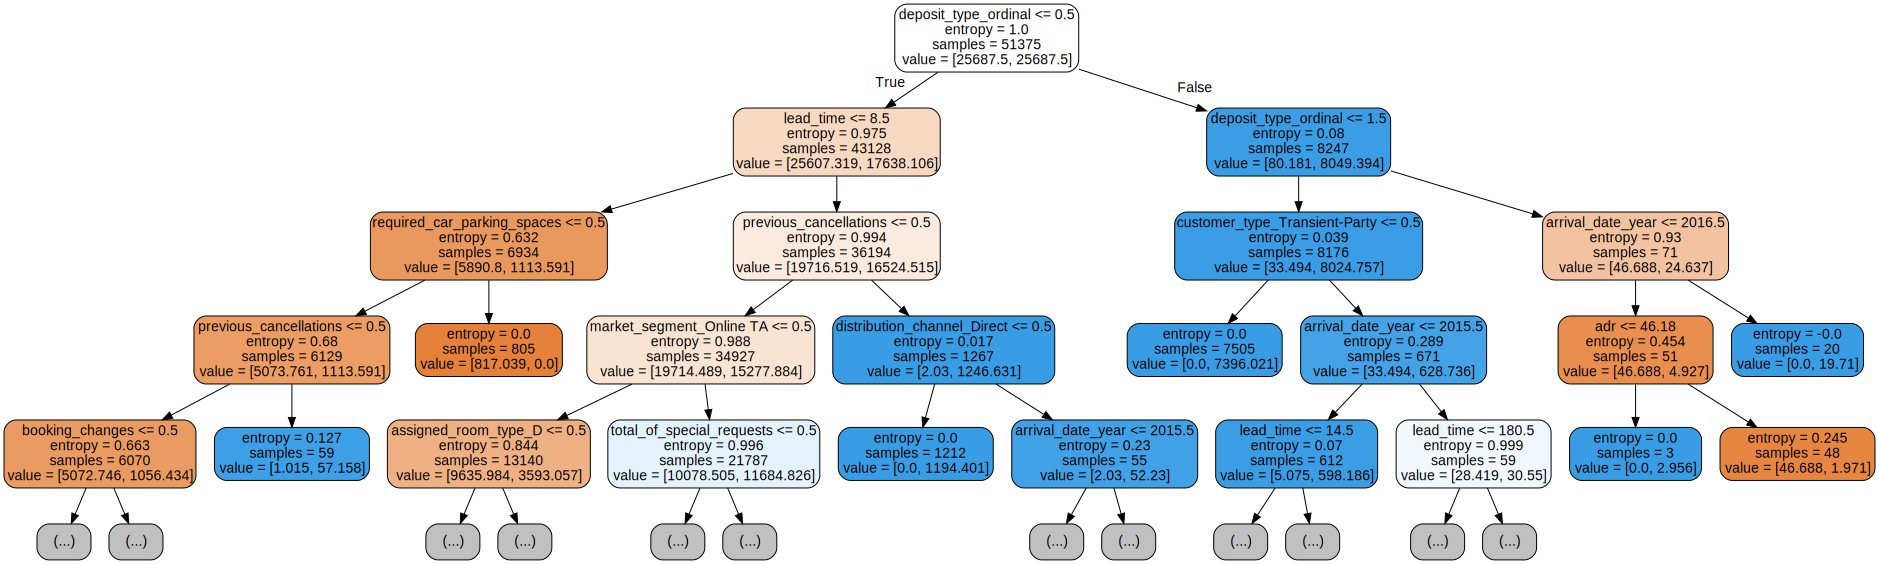

In [ ]:
dot_data = export_graphviz(best_model, out_file=None, feature_names=dataframe_copy_x.columns, filled=True, rounded=True, max_depth=4)
graphviz.Source(dot_data)

###**Performance**

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2832
           1       0.84      0.83      0.83      2877

    accuracy                           0.83      5709
   macro avg       0.83      0.83      0.83      5709
weighted avg       0.83      0.83      0.83      5709

F1-Score: 0.8345601121626358


Text(34.08333333333333, 0.5, 'True')

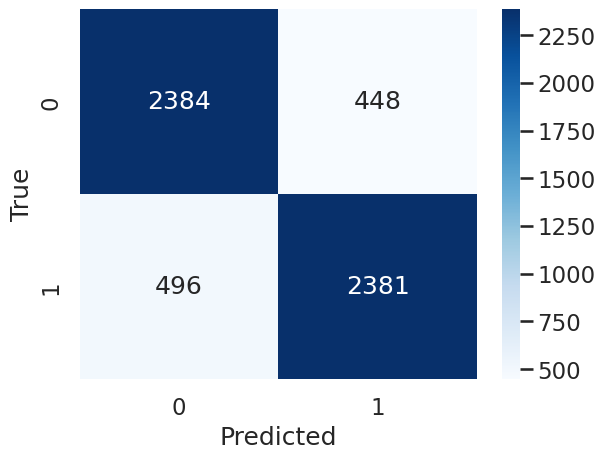

In [ ]:
y_pred= best_model.predict(x_test)
print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

Podemos ver que nuestro modelo predice correctamente la misma proporción de cantidad entre cancelados y no cancelados.
También aca podemos ver que obtuvimos un f1 score mejor que en los anteriores modelos.

In [ ]:
import joblib
joblib.dump(best_model, 'modelo_final.pkl')
loaded_model = joblib.load('modelo_final.pkl')
predicciones = loaded_model.predict(dataframe_test_copia)

In [ ]:
df_sub = pd.DataFrame({'id': dataframe_hotel_test['id'], 'is_canceled': predicciones})
df_sub.to_csv('modelo_final.csv', index=False)

#**Conclusión**

Comparando los 3 modelos que obtuvimos, podemos ver que hay una leve mejoría en
cada modelo respectivamente comparados entre sí

Utilizamos la metrica *f1 score* el cual seleccionamos aleatoriamente, porque consideramos la mejor métrica para este modelo con respecto a las demás.

se realizaron varias pruebas de modelos, se seleccionaron los 3 mejores modelos.